# One Neuron for your water Consumption

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

## Water Function
Calculate your water

In [3]:
WATER = lambda DAY_TIME, WORKOUT_TIME : DAY_TIME * 0.2 - 1.4 + WORKOUT_TIME * 0.5

In [4]:
X = np.linspace(7, 20, 14)
Y = np.linspace(0, 2, 4)
X, Y = np.meshgrid(X, Y)
Z = X * 0.2 - 1.4 + Y * 0.5

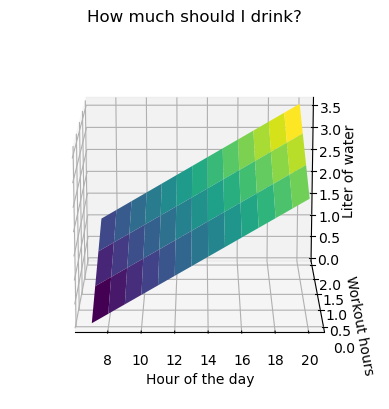

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('How much should I drink?')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Workout hours')
ax.set_zlabel('Liter of water')

ax.view_init(15, -90, 0)

plt.show()

## Build Architecture

## Create Trainingsdata

## Synthetic Neuron

In [7]:
# configuration
learning_rate = 0.01

## preset/initials
# initial weights
w1, w2 = 0, 0

# initial bias
bias = 0

In [8]:
## Neuron Function
# Activation Function ReLU (Rectified Linear Unit)
def ReLU(x) :
    return max(0, x)

# Inner neuron
def compute_neuron(X, W, bias) :
    return np.dot(X, W) + bias
    #return ReLU( y_ )

# Loss (Error)
def compute_loss(Y_true, Y_pred) :
    return np.mean( (Y_true - Y_pred) ** 2 )

# Gradients for Learning
def compute_gradients(X, Y_true, Y_pred, W, bias) :
    dW = -2 * np.dot(X.T, (Y_true - Y_pred) / len(X))
    dB = -2 * np.sum(Y_true - Y_pred) / len(X)
    return dW, dB

# Update the weights
def update_weights(W, bias, dW, dB, learning_rate) :
    W    -= learning_rate * dW
    bias  = -0.07#-= learning_rate * dB
    return W, bias

In [9]:
sample_count = 10

x1 = list()
x2 = list()
y = list()

for i in range(sample_count) :
    x1.append( random.random() * (20-7) + 7 )
    x2.append( random.random() * 7)
    y.append( WATER(x1[-1], x2[-1]) )

X = np.vstack((np.array(x1), np.array(x2))).T
Y = np.array(y)

In [10]:
X /= 20
Y /= 20

# Initialize weights and bias
weights = np.random.rand(2)  # Two weights for two input features
bias = np.random.rand()

# Training parameters
learning_rate = 0.01
epochs = 1000

weight_history = list()
loss_history   = list()

# Training loop
for epoch in range(epochs):
    # Compute neuron output
    Y_pred = compute_neuron(X, weights, bias)

    # Compute loss
    loss = compute_loss(Y, Y_pred)

    # Compute gradients
    dW, dB = compute_gradients(X, Y, Y_pred, weights, bias)

    # Update weights and bias
    weights, bias = update_weights(weights, bias, dW, dB, learning_rate)
    # Optionally, print the loss at certain intervals
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
        print(weights)
        weight_history.append((weights[0], weights[1]))
        loss_history.append(loss)

# Final weights and bias
print("Final weights:", weights)
print("Final bias:", bias)


Epoch 0, Loss: 0.3604166573152031
[0.87591383 0.05441384]
Epoch 10, Loss: 0.1378348804025597
[0.82051053 0.04186416]
Epoch 20, Loss: 0.11144725355336331
[0.77081767 0.03073452]
Epoch 30, Loss: 0.09024152117088981
[0.72624366 0.02087753]
Epoch 40, Loss: 0.0731995395770357
[0.6862582  0.01216111]
Epoch 50, Loss: 0.05950321317636479
[0.65038594 0.00446682]
Epoch 60, Loss: 0.04849518836851781
[ 0.61820077 -0.00231146]
Epoch 70, Loss: 0.03964727044655923
[ 0.58932075 -0.0082689 ]
Epoch 80, Loss: 0.03253504604425633
[ 0.56340348 -0.01349078]
Epoch 90, Loss: 0.026817491846167635
[ 0.54014205 -0.01805355]
Epoch 100, Loss: 0.02222058984366015
[ 0.51926137 -0.02202574]
Epoch 110, Loss: 0.018524161917882778
[ 0.50051482 -0.02546879]
Epoch 120, Loss: 0.01555129120602837
[ 0.48368134 -0.02843775]
Epoch 130, Loss: 0.013159821991422016
[ 0.46856279 -0.03098199]
Epoch 140, Loss: 0.011235529722418622
[ 0.45498155 -0.03314575]
Epoch 150, Loss: 0.009686633007854831
[ 0.44277838 -0.03496868]
Epoch 160, Lo

In [11]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x, y = np.meshgrid(x, y)

z = list()
for i in range(100) :
    z_i = list()
    for j in range(100):
        z_i.append(
            compute_loss(Y, compute_neuron(
                X, 
                np.array([x[i, j],y[i, j]]), 
                -0.07)
            )
        )
    z.append(z_i)

z = np.array(z)


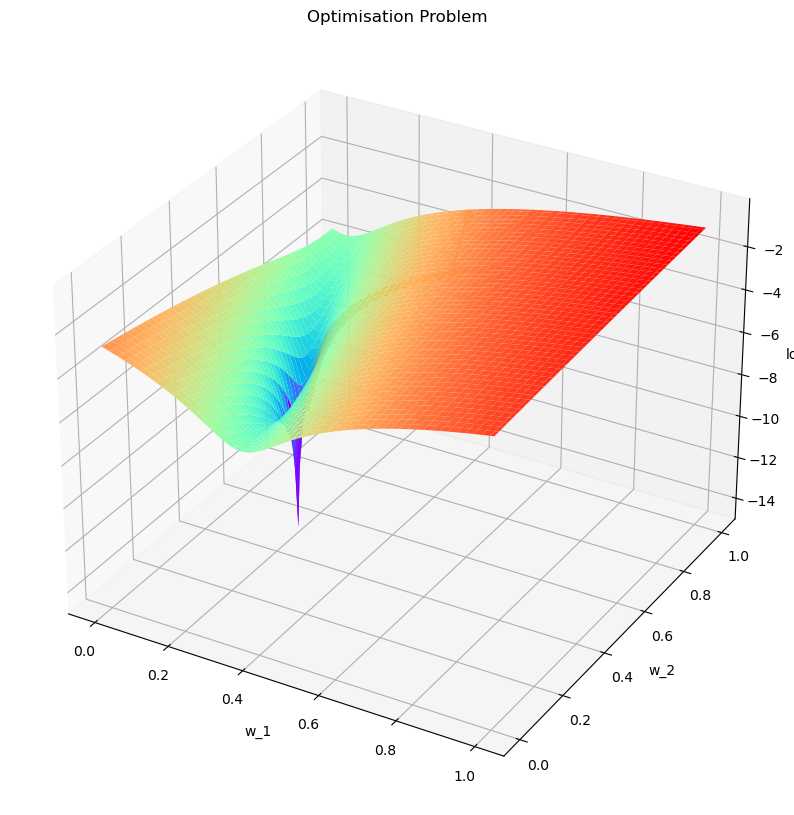

In [ ]:

fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, np.log(z), cmap='rainbow')
w1_history, w2_history = zip(*weight_history)
ax.plot(w1_history, w2_history, np.log(loss_history), marker='o')


ax.set_title('Optimisation Problem')
ax.set_xlabel('w_1')
ax.set_ylabel('w_2')
ax.set_zlabel('loss')

#ax.view_init(0, 0, 0)

plt.show()

In [ ]:
import matplotlib
#matplotlib.use('TkAgg')  # or 'Qt5Agg', 'GTK3Agg', etc.
import matplotlib.pyplot as plt
plt.ion()  # Turn on interactive mode

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, np.log(z), cmap='rainbow')
w1_history, w2_history = zip(*weight_history)
ax.plot(w1_history, w2_history, np.log(loss_history), marker='o')


ax.set_title('Optimisation Problem')
ax.set_xlabel('w_1')
ax.set_ylabel('w_2')
ax.set_zlabel('loss')

#ax.view_init(0, 0, 0)

plt.show()

: 